In [54]:
import matplotlib.pyplot as plt
from matplotlib import cm
from matplotlib.ticker import LinearLocator
import numpy as np
import math
%matplotlib inline

In [886]:
rD = np.array([0, 1, 0]) # dipole position
rD2= np.array([1, 1, 0]) # 2nd dipole position
nD = np.array([0, 0, 1]) # direction (unit vector)
nD2= np.array([0, 0, -1]) # direction2 (unit vector)
nD = nD/np.linalg.norm(nD)
nD2 = nD/np.linalg.norm(nD2)
Npoints = 101
xmax = 50
coord = np.linspace(-xmax, xmax, Npoints)

xa, ya, za = np.meshgrid(coord,coord,coord, indexing="ij")

In [1]:
1e-6

1e-06

In [809]:
idx, idy, idz = 100, 56, 100

In [810]:
ya[idx,idy,idz]

6.0

In [894]:
idc = (101, 50, 101)
za[100, 100, 0]


-50.0

## Intensity at point $\vec{r}$ for a dipole aligned along the z-direction

In [812]:
idc = (100, 56, 100)
Rvec = [ xa[idc]-rD[0] , ya[idc]-rD[1] , za[idc]-rD[2] ]
Rvec2 = [ xa[idc]-rD2[0] , ya[idc]-rD2[1] , za[idc]-rD[2] ]
R = np.linalg.norm(Rvec)
R2 = np.linalg.norm(Rvec2)


Runit = Rvec/R

Runit2 = Rvec/R2



In [813]:
za[idc]-rD[2]

50.0

In [814]:
Runit2

array([0.70737847, 0.0848854 , 0.70737847])

In [815]:
Runit

array([0.70457486, 0.08454897, 0.70457486])

In [816]:
np.linalg.norm(Runit)

0.9999999999999999

In [817]:
cosΘ = np.dot(Runit, nD)

Θ = np.arccos( cosΘ )

In [871]:
def Arad(kR,Θ,nD,kd):
    return (np.exp(1j*kR)/kR)* ( (np.cos(kd*np.cos(Θ)) - np.cos(kd) )/np.sin(Θ)**2 )*nD

In [872]:
def Erad(ω,R,kR,Θ,nD,k):
    return -1j*ω*np.cross(R,np.cross(R, Arad(kR,Θ,nD,kd)))

In [820]:
nD

array([0., 0., 1.])

In [855]:
λ=1
k=2*np.pi/λ
d=λ/2
kd = k*d
ω=3*10^8

In [822]:
dip1=Arad(k*R,Θ,nD,d)

In [823]:
dip2=Arad(k*R2,Θ+np.pi/2,nD,d)

In [824]:
sup12=dip1+dip2

In [825]:
xx, zz = xa[:,50,:], za[:,50,:]

In [826]:
xx[2,3], zz[10,10]

(-48.0, -40.0)

In [863]:
Afield = np.zeros((*xx.shape,3),dtype=complex)
Afield2 = np.zeros((*xx.shape,3),dtype=complex)
Efield= np.zeros((*xx.shape,3),dtype=complex)
Efield2= np.zeros((*xx.shape,3),dtype=complex)
I1=np.zeros(xx.shape,dtype=complex)
I2=np.zeros(xx.shape,dtype=complex)
I3=np.zeros(xx.shape,dtype=complex)

In [862]:
(*xx.shape,3)

(101, 101, 3)

In [887]:
for ii in range(Npoints):
    for kk in range(Npoints):
        Rvec = [ xx[ii,kk]-rD[0] , 0-rD[1] , zz[ii,kk]-rD[2] ] 
        Rvec2=[ xx[ii,kk]-rD2[0] , 0-rD2[1] , zz[ii,kk]-rD2[2] ] 
        R = np.linalg.norm(Rvec)
        R2 = np.linalg.norm(Rvec2)
        Runit = Rvec/R
        Runit2 = Rvec2/R2
        cosΘ = np.dot(Runit, nD)
        Θ = np.arccos( cosΘ )
        cosΘ = np.dot(Runit2, nD2)
        Θ2 = np.arccos(cosΘ)
        Afield[ii,kk,:] = Arad(k*R,Θ,nD,kd)
        Afield2[ii,kk,:] = Arad(k*R2,Θ2,nD2,kd)
        Efield[ii,kk,:] = Erad(ω,Runit,k*R,Θ,nD,kd)
        Efield2[ii,kk,:] = Erad(ω,Runit2,k*R2,Θ2,nD2,kd)
        I1[ii,kk]=np.linalg.norm(Efield[ii,kk,:])**2
        I2[ii,kk]=np.linalg.norm(Efield2[ii,kk,:])**2
        I3[ii,kk]=np.linalg.norm(Efield2[ii,kk,:]+Efield[ii,kk,:])**2

In [869]:
Rvec2

[49.6, -1.0, 50.0]

In [836]:
sup12=np.add(I1,I2)

In [838]:
sup12

array([[0.0008358 +0.j, 0.00090692+0.j, 0.00098477+0.j, ...,
        0.00098477+0.j, 0.00090692+0.j, 0.0008358 +0.j],
       [0.00080127+0.j, 0.00087024+0.j, 0.00094587+0.j, ...,
        0.00094587+0.j, 0.00087024+0.j, 0.00080127+0.j],
       [0.00076684+0.j, 0.00083355+0.j, 0.00090684+0.j, ...,
        0.00090684+0.j, 0.00083355+0.j, 0.00076684+0.j],
       ...,
       [0.00076968+0.j, 0.00083648+0.j, 0.00090988+0.j, ...,
        0.00090988+0.j, 0.00083648+0.j, 0.00076968+0.j],
       [0.00080403+0.j, 0.00087309+0.j, 0.00094881+0.j, ...,
        0.00094881+0.j, 0.00087309+0.j, 0.00080403+0.j],
       [0.00083849+0.j, 0.00090969+0.j, 0.00098761+0.j, ...,
        0.00098761+0.j, 0.00090969+0.j, 0.00083849+0.j]])

In [865]:
fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(projection='3d')

surf=ax.plot_surface(xx,zz, I1, cmap=plt.cm.YlGnBu_r) 


# Tweak the limits and add latex math labels.
ax.set_zlim(-10, 10)
ax.set_xlabel(r'$\phi_\mathrm{real}$')
ax.set_ylabel(r'$\phi_\mathrm{im}$')
ax.set_zlabel(r'$V(\phi)$')
plt.show()

TypeError: Cannot cast array data from dtype('complex128') to dtype('int64') according to the rule 'safe'

<Figure size 720x720 with 1 Axes>

In [594]:
plt.contour?

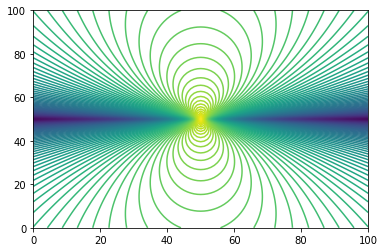

In [883]:
plt.contour(np.log(I1), levels=100)

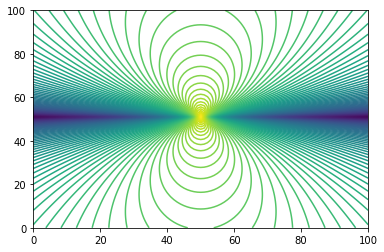

In [888]:
plt.contour(np.log(I2), levels=100)

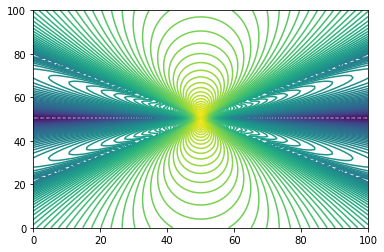

In [889]:
plt.contour(np.log(I3), levels=100)